<a href="https://colab.research.google.com/github/nervaljunior/IA-ML-hub/blob/main/C%C3%B3pia_de_Arima_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; overflow: hidden;">
        <h1>Time Series Analysis</h1>
        <h1>ARIMA Models</h1>
        <p>Nerval Junior e Fabricio Santos<br/>
        <a href="https://github.com/nervaljunior">github</a><br/>
        @nervalzin_d</p></div>
</div>


#### **`ARIMA`**

Método estatístico que utiliza autoregressão e médias móveis para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e os dados são preparados por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo **ARMA**.

---

# Passos do Modelo ARIMA:

1. Tornar os dados estacionários por diferenciação. (I)
2. Ajustar um modelo AR. (AR)
3. Ajustar um modelo MA nos resíduos. (MA)
4. Obter os dados originais de volta.

---

*   **AR**: *Autoregression* : Um modelo que usa a relação dependende entre uma observação e alguns lags.

Equation for AR model : <br>
![alt text](https://i.stack.imgur.com/cj6yX.png)

A função simplesmente multiplica os coeficientes $\theta$ com os valores em execução das variáveis estocásticas $\epsilon$. Geramos alguns exemplos de processos MA.

*   **I**: *Integrated*  : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

*  **MA**: *Moving Average* : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

          residual error = expected − predicted
    
- Isso é diferente de **Moving Average Smoothing.**
- Erros residuais contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros residuais.
- Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.




---

O modelo arima contém alguns parâmetros


```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wind_merged.xlsx to wind_merged.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel('/content/wind_merged.xlsx',header=0, index_col=0, parse_dates=True, squeeze=True)
df.head()

<ipython-input-1-00d6104980a8>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_excel('/content/wind_merged.xlsx',header=0, index_col=0, parse_dates=True, squeeze=True)


,Int Temp (°C),Ext Temp (°C),Pressure (hPa),Rel Humidity (%),Wiper count,Vbatt (V),40m Wind Speed (m/s),40m Wind Speed Dispersion (m/s),40m Wind Speed min (m/s),40m Wind Speed max (m/s),...,260m Wind Speed Dispersion (m/s),260m Wind Speed min (m/s),260m Wind Speed max (m/s),260m Wind Direction (°),260m Z-wind (m/s),260m Z-wind Dispersion (m/s),260m CNR (dB),260m CNR min (dB),260m Dopp Spect Broad (m/s),260m Data Availability (%)
Timestamp (end of interval),,,,,,,,,,,,,,,,,,,,,
2023-02-26 11:50:00,37.4,999,999,999,0,NaN,5.04,1.21,2.11,7.89,...,1.23,2.87,9.36,325.56,0.20,0.66,-19.48,-21.80,0.08,100.00
2023-02-26 12:00:00,37.7,999,999,999,0,NaN,5.61,1.15,2.79,9.87,...,1.26,1.86,10.72,324.24,0.36,0.81,-20.08,-22.93,0.09,98.67
2023-02-26 12:10:00,38.2,999,999,999,0,NaN,4.96,1.44,1.10,7.98,...,1.54,1.22,10.01,339.82,-0.60,1.60,-20.22,-22.87,0.16,99.33
2023-02-26 12:20:00,38.8,999,999,999,0,NaN,5.30,1.23,1.50,9.55,...,1.64,1.09,8.80,323.29,0.43,1.09,-20.14,-21.87,0.11,100.00
2023-02-26 12:30:00,39.0,999,999,999,0,NaN,3.94,1.23,0.54,7.52,...,1.18,2.20,9.21,314.48,-0.06,0.91,-20.16,-22.60,0.12,100.00


In [ ]:
# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

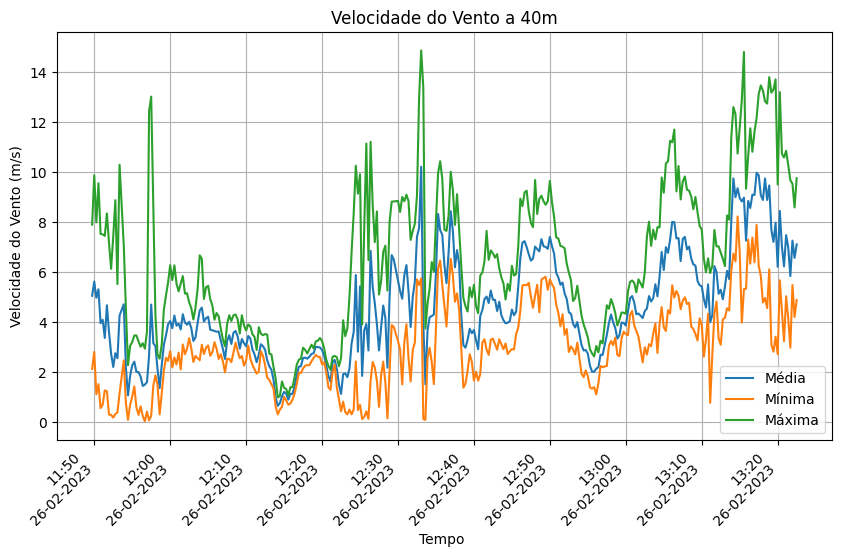

In [ ]:
import matplotlib.pyplot as plt
dados_velocidade = df[['40m Wind Speed (m/s)', '40m Wind Speed min (m/s)', '40m Wind Speed max (m/s)']]

ax = dados_velocidade.plot(figsize=(10, 6))  # Tamanho opcional do gráfico

# Ajustar formato do eixo x para mostrar apenas o horário e o dia
ax.set_xticklabels([str(item.strftime('%H:%M\n%d-%m-%Y')) for item in dados_velocidade.index], rotation=45)
# Plotar os dados
plt.title('Velocidade do Vento a 40m')
plt.xlabel('Tempo ')
plt.ylabel('Velocidade do Vento (m/s)')
plt.grid(True)
plt.legend(['Média', 'Mínima', 'Máxima'])
plt.show()

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2023-02-26 11:50:00 to 2023-02-28 19:30:00
Columns: 245 entries, Int Temp (°C) to 260m Data Availability (%)
dtypes: float64(241), int64(4)
memory usage: 634.2 KB


(330, 245)

In [ ]:
df.index.min(), df.index.max()

(Timestamp('2023-02-26 11:50:00'), Timestamp('2023-02-28 19:30:00'))

In [ ]:
velocidade_media = df[['40m Wind Speed (m/s)']]
velocidade_media.head()

,40m Wind Speed (m/s)
Timestamp (end of interval),
2023-02-26 11:50:00,5.04
2023-02-26 12:00:00,5.61
2023-02-26 12:10:00,4.96
2023-02-26 12:20:00,5.30
2023-02-26 12:30:00,3.94


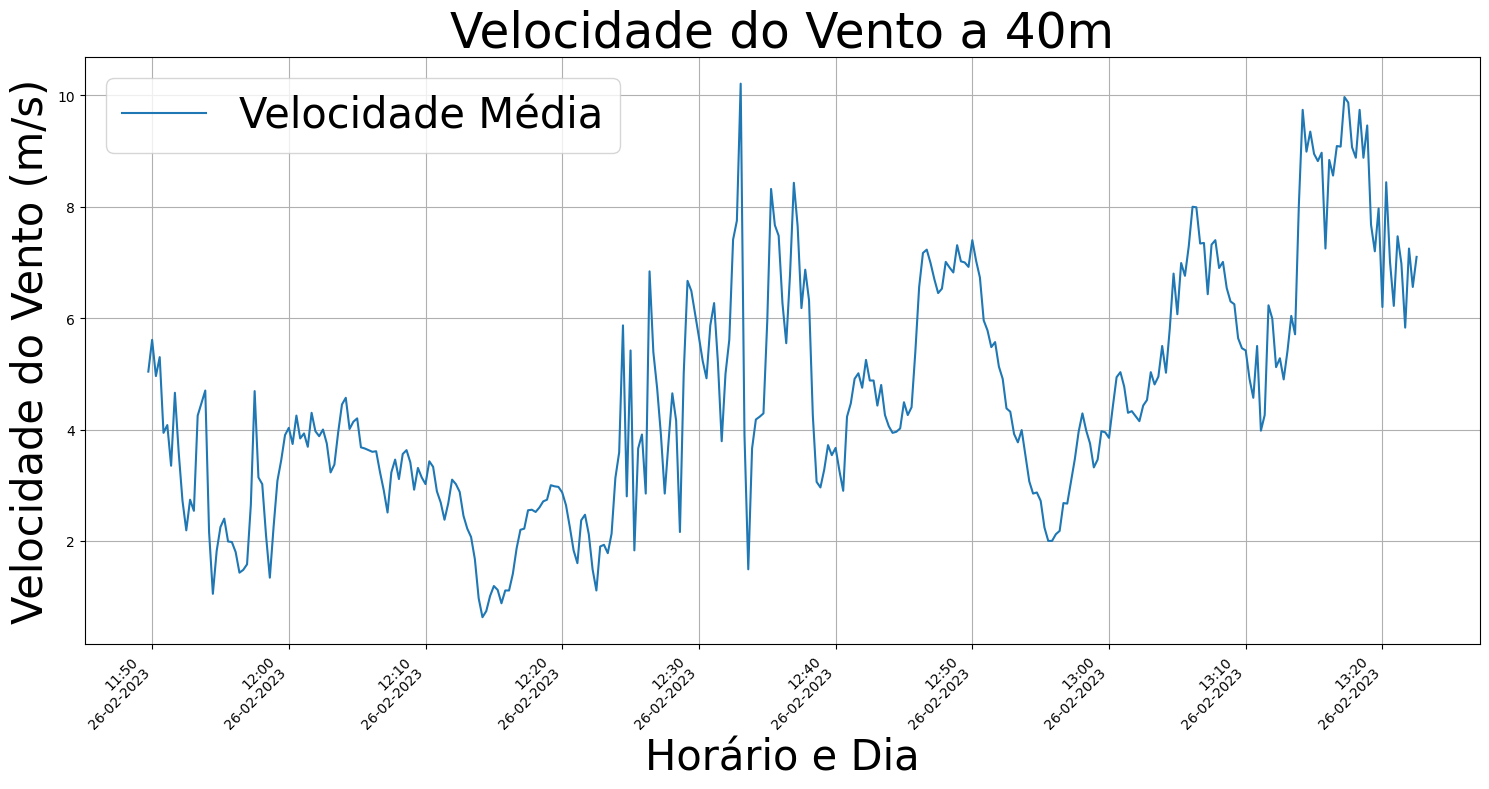

In [ ]:
#velocidade_media.plot()
ax = velocidade_media.plot(figsize=(15, 8))  # Tamanho opcional do gráfico

# Ajustar formato do eixo x para mostrar apenas o horário e o dia
ax.set_xticklabels([str(item.strftime('%H:%M\n%d-%m-%Y')) for item in velocidade_media.index], rotation=45)

plt.title('Velocidade do Vento a 40m', fontsize=35)  # Aumentar o tamanho da fonte do título
plt.xlabel('Horário e Dia', fontsize=30)  # Aumentar o tamanho da fonte do rótulo do eixo x
plt.ylabel('Velocidade do Vento (m/s)', fontsize=30)  # Aumentar o tamanho da fonte do rótulo do eixo y
plt.grid(True)
plt.legend(['Velocidade Média'], loc='upper left', fontsize=30)  # Aumentar o tamanho da fonte da legenda
plt.tight_layout()  # Ajustar layout para evitar sobreposição de rótulos
plt.show()

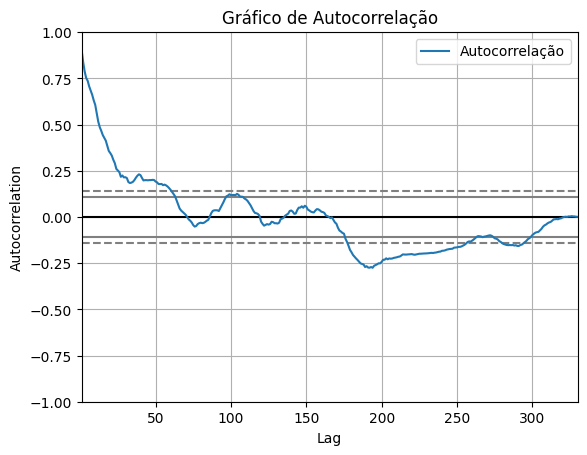

In [ ]:
from pandas.plotting import autocorrelation_plot
# autocorrelation plot

autocorrelation_plot(velocidade_media, label='Autocorrelação')
plt.title("Gráfico de Autocorrelação")
plt.legend()
plt.show()

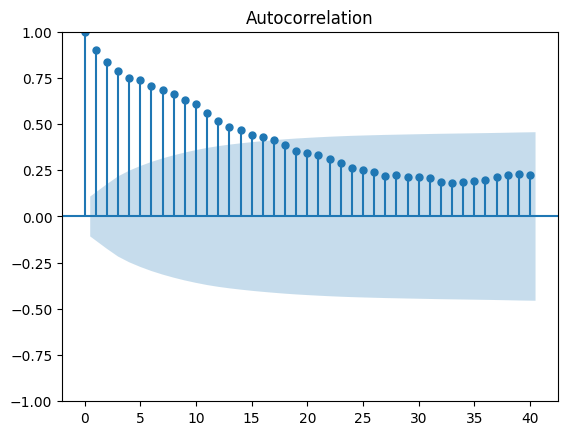

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(velocidade_media, lags=40)
plt.show()

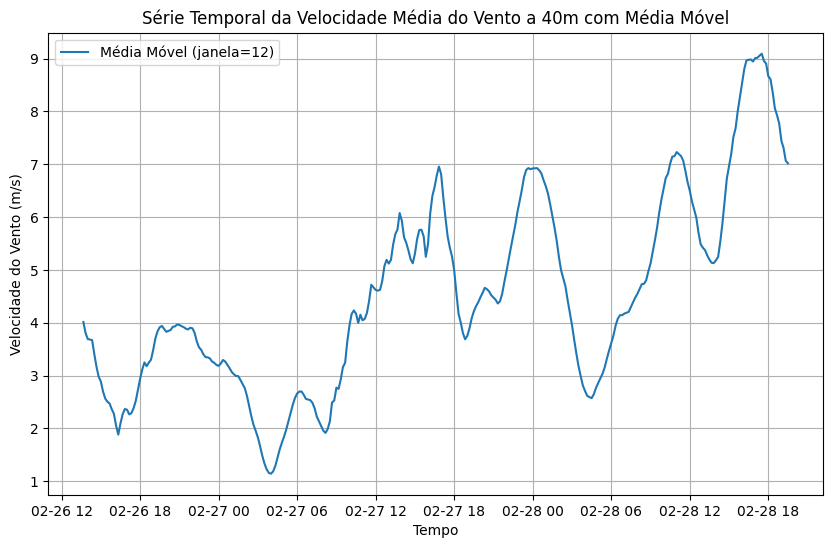

In [ ]:
# Média móvel
media_movel = velocidade_media.rolling(window=12).mean()

# Crie um gráfico da série temporal da velocidade média do vento com a média móvel
#plt.plot(velocidade_media, label='Série Temporal Original')
plt.figure(figsize=(10, 6))
plt.plot(media_movel, label='Média Móvel (janela=12)')
plt.title('Série Temporal da Velocidade Média do Vento a 40m com Média Móvel')
plt.xlabel('Tempo')
plt.ylabel('Velocidade do Vento (m/s)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
i=0
def diferenciar_serie_para_arima(serie, max_iter=5):
    global i
    for i in range(max_iter):
        i+=1
        # Diferenciação
        diff_series = serie.diff().dropna()

        diff_series = velocidade_media.diff().dropna()

        # Plot da série diferenciada
        diff_series.plot(figsize=(15, 6))
        plt.title(f'Série Diferenciada da Velocidade do Vento a 40m - Iteração {i}', fontsize=20)
        plt.xlabel('Data', fontsize=15)
        plt.ylabel('Valor', fontsize=15)
        plt.grid(True)
        plt.show()

        # Calcula ACF e PACF
        acf_vals, acf_confint = sm.tsa.acf(diff_series, nlags=50, alpha=0.05)
        pacf_vals, pacf_confint = sm.tsa.pacf(diff_series, nlags=50, alpha=0.05)

        # Verifica a significância dos coeficientes
        significant_acf = np.any((acf_vals > acf_confint[:, 1]) | (acf_vals < acf_confint[:, 0]))
        significant_pacf = np.any((pacf_vals > pacf_confint[:, 1]) | (pacf_vals < pacf_confint[:, 0]))



        # Se ambos ACF e PACF forem insignificantes, interrompa o loop
        if not (significant_acf or significant_pacf):
            print("Série diferenciada ideal para modelagem ARIMA.")
            return diff_series

        # Atualiza a série original para a próxima iteração
        serie = diff_series

    print("Número máximo de iterações atingido. A série pode não ser adequada para modelagem ARIMA.")
    return diff_series


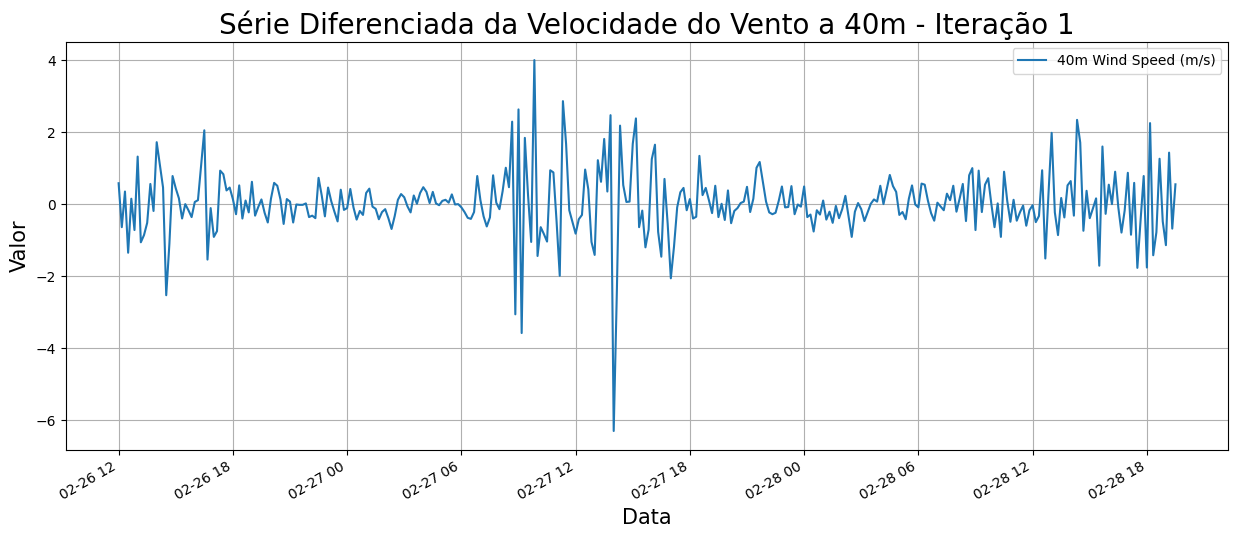

Série diferenciada ideal para modelagem ARIMA.


In [ ]:
serie_diferenciada = diferenciar_serie_para_arima(velocidade_media)

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def adf_check(time_series):
    result = adfuller(time_series, autolag='AIC')
    print('Teste Aumentado de Dickey-Fuller:')
    labels = ['Estatística do Teste ADF', 'Valor-p', 'Número de Defasagens Utilizadas', 'Número de Observações Utilizadas']

    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))

    if result[1] <= 0.05:
        print("Forte evidência contra a hipótese nula, rejeita-se a hipótese nula. Os dados não têm raiz unitária e são estacionários")
        return True
    else:
        print("Evidência fraca contra a hipótese nula, a série temporal possui uma raiz unitária, indicando que é não estacionária \n")
        return False

def verificar_estacionariedade_e_ideal_arima(serie, max_iter=5):
    # Verifica estacionariedade
    estacionario = adf_check(serie)

    # Se estiver estacionário, verifica se é ideal para ARIMA
    if estacionario:
        # Verificar se é ideal para ARIMA
        serie_diferenciada = diferenciar_serie_para_arima(serie, max_iter)
        return serie_diferenciada
    else:
        # Se não estiver estacionário, diferencia e verifica novamente
        for i in range(max_iter):
            serie = serie.diff().diff().dropna()
            print(f"Iteração {i+1} - Diferenciação realizada.")

            # Verifica estacionariedade após diferenciação
            estacionario = adf_check(serie)

            # Se estiver estacionário, verifica se é ideal para ARIMA
            if estacionario:
                # Verificar se é ideal para ARIMA
                serie_diferenciada = diferenciar_serie_para_arima(serie, max_iter)
                return serie_diferenciada

        print("Número máximo de iterações atingido. A série pode não ser adequada para modelagem ARIMA.")
        return serie

# Passo 1: Tornando os dados estacionários

Diferentes técnicas podem ser usadas para tornar os dados estacionários, como o uso de logaritmo e diferenciação. A diferenciação adicional diff(12) é usada para remover a sazonalidade.

Teste Aumentado de Dickey-Fuller:
Estatística do Teste ADF : -2.2818480272195316
Valor-p : 0.17788918996977815
Número de Defasagens Utilizadas : 4
Número de Observações Utilizadas : 325
Evidência fraca contra a hipótese nula, a série temporal possui uma raiz unitária, indicando que é não estacionária 

Iteração 1 - Diferenciação realizada.
Teste Aumentado de Dickey-Fuller:
Estatística do Teste ADF : -11.786432097014963
Valor-p : 1.0062434657410242e-21
Número de Defasagens Utilizadas : 9
Número de Observações Utilizadas : 318
Forte evidência contra a hipótese nula, rejeita-se a hipótese nula. Os dados não têm raiz unitária e são estacionários


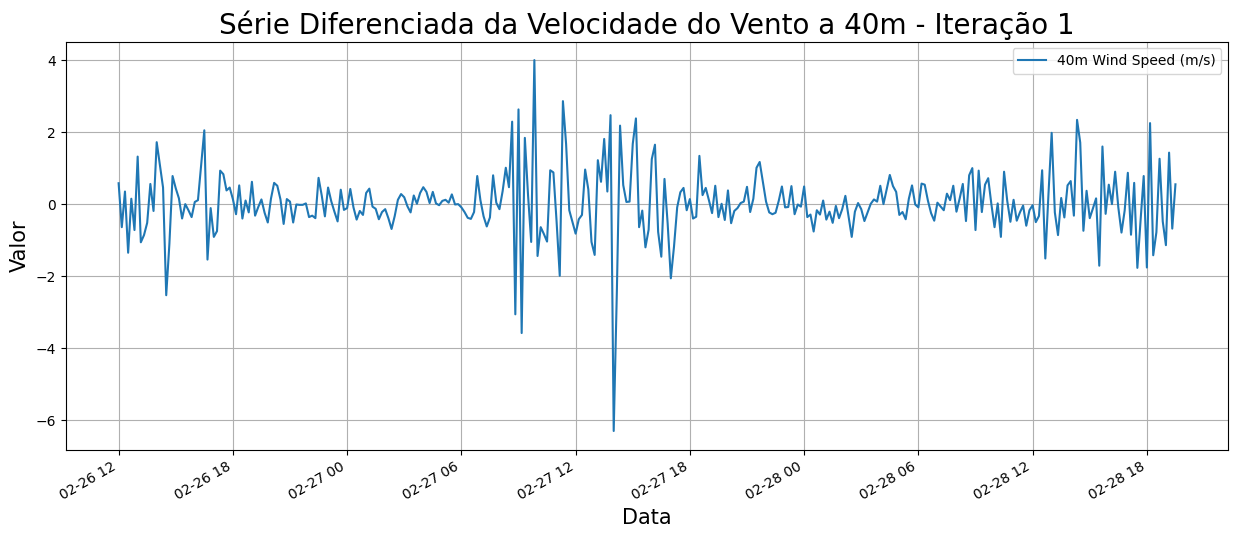

Série diferenciada ideal para modelagem ARIMA.


In [ ]:
serie_diferenciada = verificar_estacionariedade_e_ideal_arima(velocidade_media)

In [ ]:
import numpy as np

def calcular_corte(amostra, defasagens):
    n = amostra - defasagens
    corte = np.abs(2 / np.sqrt(n))
    return corte

# Exemplo de uso:
amostra = velocidade_media.shape[0]

defasagens = i
corte = calcular_corte(amostra, defasagens)
print("Valor de corte:", corte)


Valor de corte: 0.11026356928399425


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Suponha que você tenha uma série temporal diferenciada chamada serie_diferenciada

# Calcula ACF e PACF
acf_vals, acf_confint = sm.tsa.acf(serie_diferenciada, nlags=50, alpha=0.05)
pacf_vals, pacf_confint = sm.tsa.pacf(serie_diferenciada, nlags=50, alpha=0.05)

# Cria um DataFrame para os resultados de ACF
acf_df = pd.DataFrame({'ACF': acf_vals[1:], 'Conf. Int. Lower': acf_confint[1:, 0], 'Conf. Int. Upper': acf_confint[1:, 1]})
acf_df.index.name = 'Lag'

# Cria um DataFrame para os resultados de PACF
pacf_df = pd.DataFrame({'PACF': pacf_vals[1:], 'Conf. Int. Lower': pacf_confint[1:, 0], 'Conf. Int. Upper': pacf_confint[1:, 1]})
pacf_df.index.name = 'Lag'

# Exibe os DataFrames
print("ACF:")
print(acf_df)
print("\nPACF:")
print(pacf_df)

# Plot ACF
plot_acf(serie_diferenciada, lags=50)
plt.title('Autocorrelação da Série Diferenciada')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação')
plt.show()

# Plot PACF
plot_pacf(serie_diferenciada, lags=50)
plt.title('Autocorrelação Parcial da Série Diferenciada')
plt.xlabel('Lags')
plt.ylabel('Autocorrelação Parcial')
plt.show()


NameError: name 'sm' is not defined

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
!pip install deap

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms
from pmdarima import auto_arima

# Configuração do algoritmo genético
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 0, 5)  # Valores de p, d, q
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Mutação
toolbox.register("select", tools.selTournament, tournsize=3)  # Seleção

# Função de Fitness
def evaluate(individual, y_train):
    p, d, q = individual
    try:
        fit_arima = auto_arima(y_train, d=d, start_p=p, start_q=q, max_p=p, max_q=q,
                                seasonal=False, trace=False, error_action='ignore', stepwise=True)
        print(fit_arima.aic())
        return fit_arima.aic(),
    except:
        return float('inf'),  # Retorna infinito se o modelo não puder ser ajustado

toolbox.register("evaluate", evaluate, y_train=velocidade_media)  # Função de fitness

# Parâmetros
sales = velocidade_media
population_size = 100
num_generations = 50
mutation_rate = 0.1

# Executar algoritmo genético
population = toolbox.population(n=population_size)
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=mutation_rate, ngen=num_generations, verbose=True)

# Retorne o melhor indivíduo encontrado
best_individual = tools.selBest(population, k=1)[0]
print("Melhor conjunto de parâmetros encontrados:", best_individual)

In [ ]:
from pmdarima import auto_arima
fit_arima = auto_arima(serie_diferenciada, d=1, start_p=1, start_q=1, max_p=3, max_q=3,
                    seasonal=False,
                           m=6,
                           D=1,
                           start_P=1,
                           start_Q=1,
                           max_P=2,
                           max_Q=2,
                           information_criterion='aic',
                           trace=True,
                           error_action='ignore',
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1159.053, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1048.964, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1157.053, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1005.362, Time=0.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=989.353, Time=0.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.75 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=987.354, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1003.362, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=4.21 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=1.38 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 23.022 seconds


Modelo ARIMA para análise de dados

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#Best model:  ARIMA(3,1,1)(2,1,0)[6]
model = ARIMA(serie_diferenciada, order=(3,1,0))
model_fit = model.fit()
# summary
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:     40m Wind Speed (m/s)   No. Observations:                  329
Model:                   ARIMA(3, 1, 0)   Log Likelihood                -489.677
Date:                  Tue, 27 Feb 2024   AIC                            987.354
Time:                          13:43:27   BIC                           1002.526
Sample:                               0   HQIC                           993.408
                                  - 329                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8162      0.034    -23.804      0.000      -0.883      -0.749
ar.L2         -0.5292      0.039    -13.466      0.000      -0.606      -0.452
ar.L3         -0.2323      0.036    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


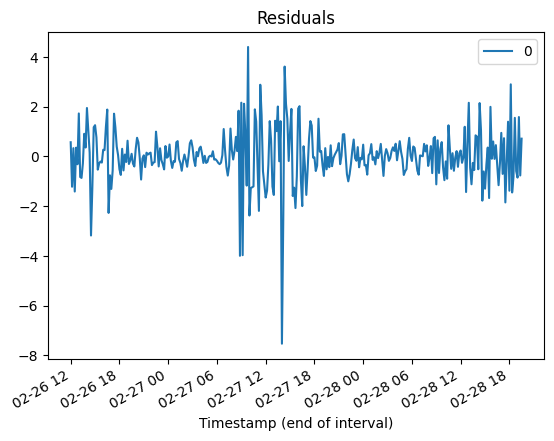

In [ ]:
# plot residuais
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

residuals.plot(title="Residuals")
plt.show()

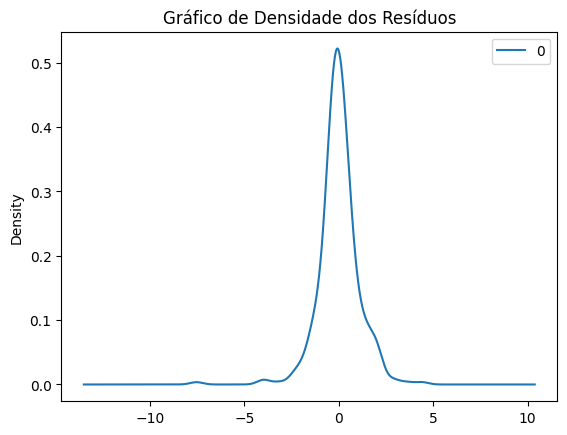

In [ ]:
# Gráfico de densidade dos resíduos
residuals.plot(kind='kde', label='Densidade dos Resíduos')
plt.title("Gráfico de Densidade dos Resíduos")
plt.legend()
plt.show()

In [ ]:
# estatística descritiva dos residuos
print(residuals.describe())

                0
count  329.000000
mean     0.000075
std      1.077012
min     -7.535776
25%     -0.431828
50%     -0.046537
75%      0.447723
max      4.403905


**Prevendo dados com ARIMA utilizando Walk Forward**

Separando os dados de treino e teste

In [ ]:
# Modelo ARIMA
modelo_arima = ARIMA(velocidade_media, order=(int(best_individual[0]),int(best_individual[1]),int(best_individual[2])))  # AR=1, I=1, MA=1

resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())



def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

velocidade_media.index = pd.to_datetime(velocidade_media.index)
velocidade_media.index = velocidade_media.index.to_period('M')

# split into train and test sets
X = velocidade_media.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(int(best_individual[0]),int(best_individual[1]),int(best_individual[2])))
	#model = ARIMA(history, order=())
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predições=%f, observações=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Previsões')
plt.title("Comparação da predição")
# Adicionando legenda e rótulos aos eixos
plt.legend()
plt.xlabel('Índice')
plt.ylabel('Valores')

# Mostrando o plot
plt.show()

In [ ]:
# a variável X recebe os dados da série
X = velocidade_media.values
X = X.astype('float32')

In [ ]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.66)

In [ ]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [ ]:
# cria a variável history
history = [x for x in train]

In [ ]:
# cria lista de previsões
predictions = list()

In [ ]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

# inicia Walk-Forward
for t in range(len(test)):
    # difference data
    meses_no_ano = 12
    diff = difference(history, meses_no_ano)

    # cria um modelo ARIMA com os dados de history
    model = ARIMA(diff, order=(int(best_individual[0]),int(best_individual[1]),int(best_individual[2])))

    # treina o modelo ARIMA
    model_fit = model.fit()

    # a variável valor_predito recebe o valor previsto pelo modelo
    valor_predito = model_fit.forecast()[0]

    # valor_predito recebe o valor revertido (escala original)
    valor_predito = inverse_difference(history, valor_predito, meses_no_ano)

    # adiciona o valor predito na lista de predicões
    predictions.append(valor_predito)

    # a variável valor_real recebe o valor real do teste
    valor_real = test[t]

    # adiciona o valor real a variável history
    history.append(valor_real)

    # imprime valor predito e valor real
    print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))


Valor predito=6.738, Valor esperado=  7
Valor predito=6.520, Valor esperado=  6
Valor predito=6.187, Valor esperado=  6
Valor predito=6.533, Valor esperado=  5
Valor predito=5.826, Valor esperado=  6
Valor predito=5.974, Valor esperado=  5
Valor predito=6.117, Valor esperado=  5
Valor predito=5.316, Valor esperado=  4
Valor predito=5.172, Valor esperado=  4
Valor predito=5.040, Valor esperado=  4
Valor predito=5.239, Valor esperado=  4
Valor predito=4.379, Valor esperado=  4
Valor predito=4.605, Valor esperado=  3
Valor predito=3.188, Valor esperado=  3
Valor predito=3.559, Valor esperado=  3
Valor predito=3.291, Valor esperado=  3
Valor predito=3.501, Valor esperado=  2
Valor predito=2.574, Valor esperado=  2
Valor predito=2.589, Valor esperado=  2
Valor predito=2.158, Valor esperado=  2
Valor predito=2.609, Valor esperado=  2
Valor predito=2.232, Valor esperado=  3
Valor predito=2.847, Valor esperado=  3
Valor predito=3.073, Valor esperado=  3
Valor predito=2.672, Valor esperado=  4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valor predito=5.480, Valor esperado=  5
Valor predito=5.913, Valor esperado=  5
Valor predito=4.472, Valor esperado=  5
Valor predito=5.944, Valor esperado=  6
Valor predito=5.947, Valor esperado=  4
Valor predito=4.154, Valor esperado=  4
Valor predito=5.095, Valor esperado=  6
Valor predito=5.946, Valor esperado=  6
Valor predito=5.733, Valor esperado=  5
Valor predito=5.285, Valor esperado=  5
Valor predito=4.944, Valor esperado=  5
Valor predito=4.874, Valor esperado=  5
Valor predito=5.393, Valor esperado=  6
Valor predito=5.370, Valor esperado=  6
Valor predito=5.154, Valor esperado=  8
Valor predito=8.328, Valor esperado= 10
Valor predito=7.155, Valor esperado=  9
Valor predito=8.228, Valor esperado=  9
Valor predito=10.258, Valor esperado=  9
Valor predito=8.037, Valor esperado=  9
Valor predito=7.569, Valor esperado=  9
Valor predito=8.419, Valor esperado=  7
Valor predito=6.332, Valor esperado=  9
Valor predito=8.809, Valor esperado=  9
Valor predito=8.417, Valor esperado=  9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valor predito=7.223, Valor esperado=  8


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valor predito=8.832, Valor esperado=  6
Valor predito=6.679, Valor esperado=  8


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valor predito=9.667, Valor esperado=  7
Valor predito=7.406, Valor esperado=  6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valor predito=6.293, Valor esperado=  7


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Valor predito=7.684, Valor esperado=  7
Valor predito=8.116, Valor esperado=  6
Valor predito=5.760, Valor esperado=  7
Valor predito=8.309, Valor esperado=  7
Valor predito=5.215, Valor esperado=  7


In [ ]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.032


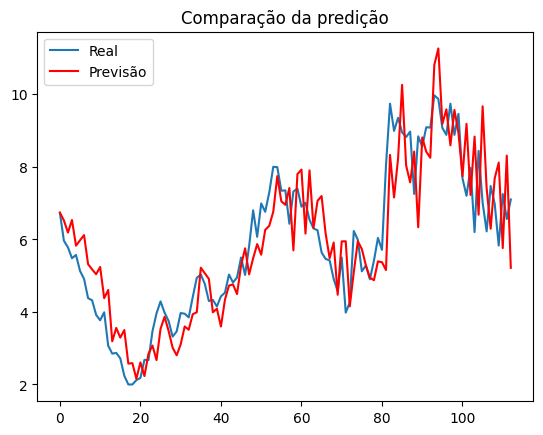

In [ ]:
# plot forecasts against actual outcomes
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Previsão')
plt.title("Comparação da predição")
plt.legend()
plt.show()

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [ ]:
# erros residuais
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [ ]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [ ]:
# imprime as 5 primeiras linhas
residuals.head()

,0
0,0.055078
1,-0.690722
2,-0.473692
3,-1.387216
4,-0.608186


In [ ]:
# estatística descritiva
residuals.describe()

,0
count,113.000000
mean,-0.038757
std,1.508892
min,-4.128194
25%,-1.134192
50%,0.136852
75%,0.964185
max,3.606761


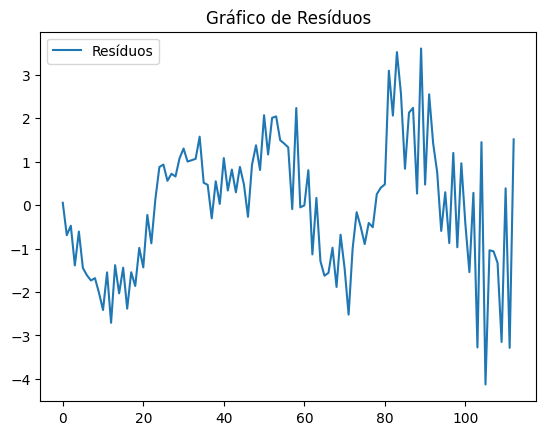

In [ ]:
plt.plot(residuals, label='Resíduos')
plt.title("Gráfico de Resíduos")
plt.legend()
plt.show()

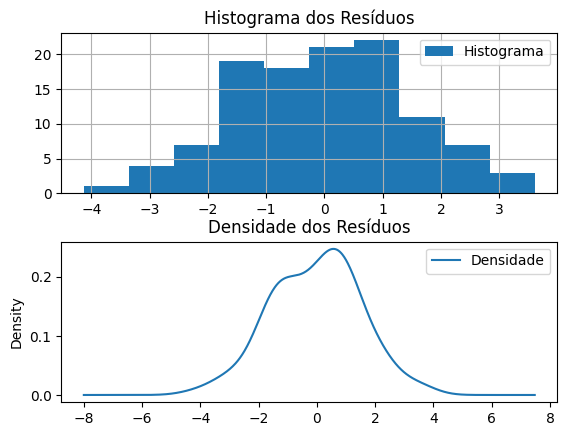

In [ ]:
# plots histograma
plt.figure()

# Histograma dos resíduos
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.title("Histograma dos Resíduos")
plt.legend(['Histograma'])

# Densidade dos resíduos
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.title("Densidade dos Resíduos")
plt.legend(['Densidade'])
plt.show()

In [ ]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

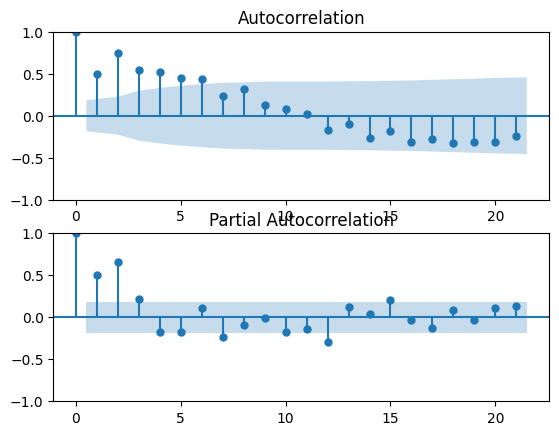

In [ ]:
# plots de autocorrelação
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

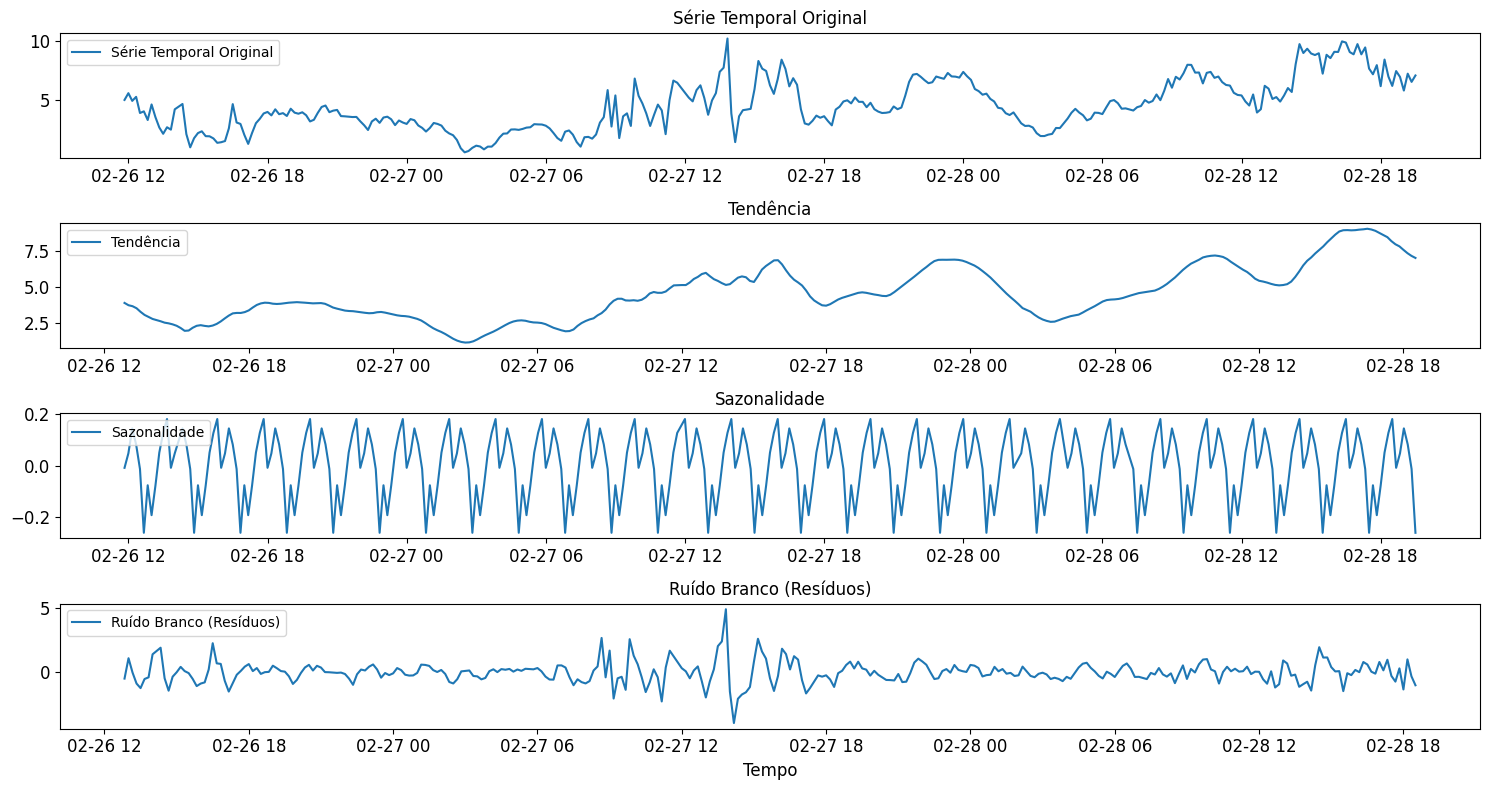

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição da série temporal
decomposition = seasonal_decompose(velocidade_media, period=12,model='additive')  # Ajuste o período sazonal conforme necessário
#decomposition = seasonal_decompose(velocidade_media, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualização dos componentes


plt.figure(figsize=(15, 8))
plt.subplot(4, 1, 1)
plt.plot(velocidade_media, label='Série Temporal Original')
plt.legend(loc='upper left')
plt.title('Série Temporal Original')
plt.tick_params(axis='both', which='major', labelsize=12)  # Aumenta o tamanho da fonte dos dados

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='upper left')
plt.title('Tendência')
plt.tick_params(axis='both', which='major', labelsize=12)  # Aumenta o tamanho da fonte dos dados
plt.xlabel('')  # Remove o rótulo do eixo x para economizar espaço

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.title('Sazonalidade')
plt.tick_params(axis='both', which='major', labelsize=12)  # Aumenta o tamanho da fonte dos dados
plt.xlabel('')  # Remove o rótulo do eixo x para economizar espaço

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Ruído Branco (Resíduos)')
plt.legend(loc='upper left')
plt.title('Ruído Branco (Resíduos)')
plt.tick_params(axis='both', which='major', labelsize=12)  # Aumenta o tamanho da fonte dos dados

plt.xlabel('Tempo', fontsize=12)  # Define o tamanho da fonte do rótulo do eixo x
plt.tight_layout()
plt.show()

nesse algoritmo Integrar algoritmos genéticos com modelos ARMA (AutoRegressive Moving Average) ou ARIMA (AutoRegressive Integrated Moving Average)  para otimizar os parâmetros do modelo e melhorar a precisão das previsões dessa maneira:

- Defina a Função de Aptidão (Fitness Function): A função de aptidão avalia a qualidade de um conjunto específico de parâmetros do modelo ARMA ou ARIMA. Isso pode ser baseado em medidas de erro, como MSE (Mean Squared Error) ou MAE (Mean Absolute Error), calculadas usando validação cruzada ou outro método de validação.

- Parâmetros do Modelo: Represente os parâmetros do modelo ARMA ou ARIMA como cromossomos em uma população. Cada cromossomo representa uma possível combinação de parâmetros.

- Inicialize a População: Gere uma população inicial de cromossomos com parâmetros aleatórios ou usando algum conhecimento prévio sobre os parâmetros.

- Avalie a Aptidão (Fitness) da População: Para cada conjunto de parâmetros na população, aplique o modelo ARMA ou ARIMA aos dados de treinamento e calcule a função de aptidão.

- Selecione os Pais: Selecione os cromossomos com as melhores funções de aptidão para serem os pais da próxima geração. Isso pode ser feito usando métodos de seleção como a roleta ou o torneio.

- Reprodução e Crossover: Use operadores de crossover para combinar os genes dos pais e criar novos cromossomos. Isso pode envolver a troca de partes dos cromossomos entre os pais.

- Mutação: Introduza aleatoriedade na população alterando alguns dos genes (parâmetros) dos cromossomos de forma aleatória.

- Avalie a Nova População: Aplique novamente o modelo ARMA ou ARIMA com os parâmetros atualizados aos dados de treinamento e calcule a função de aptidão para a nova população.

- Critério de Parada: Repita os passos 5 a 8 por um número fixo de gerações ou até que a convergência seja alcançada com base em algum critério de parada, como estagnação da melhoria da função de aptidão.

- Retorne o Melhor Modelo: Após as iterações, retorne o conjunto de parâmetros do modelo que produziu a melhor função de aptidão como a solução otimizada.

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculando MAE e MAPE
mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100

# Imprimindo MAE e MAPE
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

Test MAE: 0.608
Test MAPE: 47.763


[[3. 2. 2. 3. 2. 2. 1.]
 [2. 1. 2. 3. 1. 2. 1.]
 [1. 3. 1. 2. 3. 2. 1.]]
MSE: 1.1776875893250585
MAE: 0.8780503318216325
RMSE: 1.0852131538665841
MSE: 1.0567856237855544
MAE: 0.8347593316924442
RMSE: 1.0280007897786627
MSE: 1.0511962836380113
MAE: 0.8322811237362163
RMSE: 1.0252786370728746
MSE: 1.4697857034679012
MAE: 1.0010925976543568
RMSE: 1.2123471876768226
MSE: 0.9760804322253845
MAE: 0.7993751238898019
RMSE: 0.9879678295498212
MSE: 0.9943294815607624
MAE: 0.782752975702274
RMSE: 0.9971607099965193
MSE: 1.020076644357603
MAE: 0.8155092167198553
RMSE: 1.0099884377346124
[2. 1. 3.]
[[2. 2. 1. 2. 2. 3. 1.]
 [2. 2. 1. 2. 1. 1. 1.]
 [3. 3. 0. 2. 2. 3. 3.]]
MSE: 0.8083429785745444
MAE: 0.6977964025224321
RMSE: 0.8990789612567655
MSE: 0.8042644564089722
MAE: 0.6957683672412039
RMSE: 0.896807926151956
MSE: 1.0119666032996188
MAE: 0.8031319281979332
RMSE: 1.0059655080069192
MSE: 0.965048716379451
MAE: 0.7727610198655731
RMSE: 0.982368930890758
MSE: 0.9586220385847758
MAE: 0.79013859364789

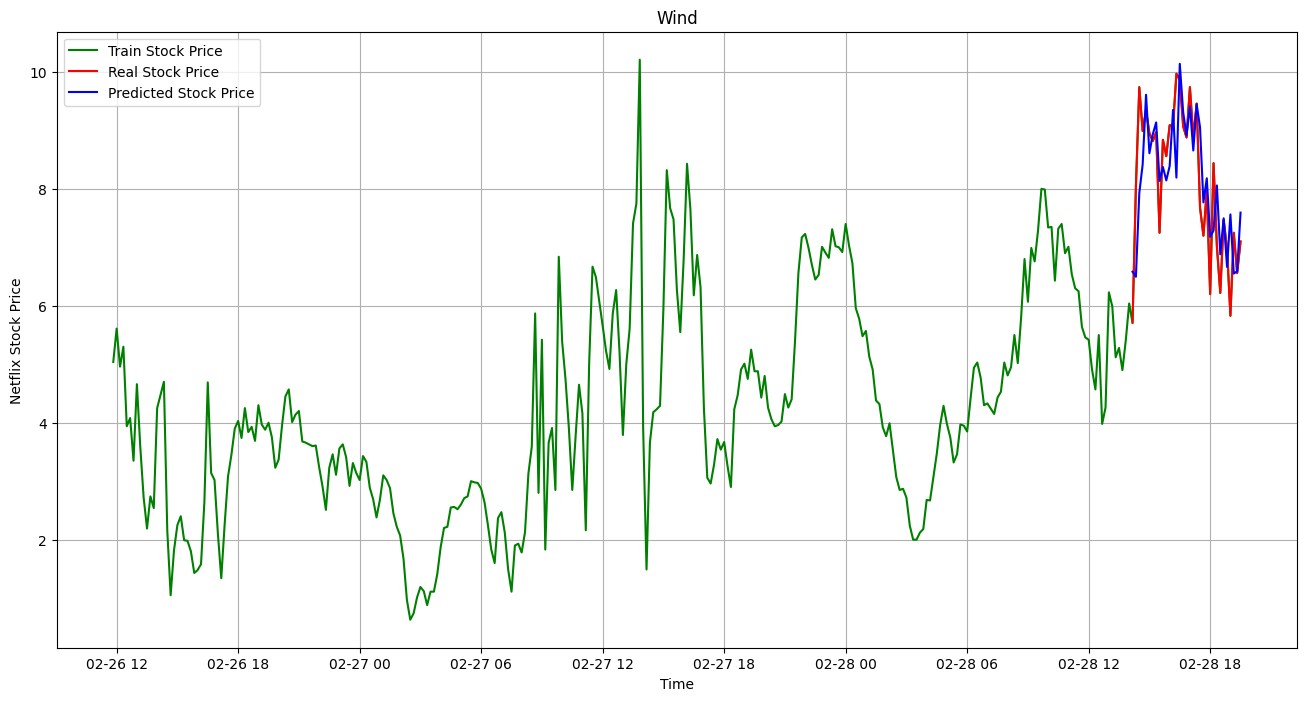

In [ ]:
 #ALGORITMO DE MUTAÇÃO
import traceback
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import math
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error


def inicializacao_pais(aux_atributo, aux_pais, lim_i, lim_s):
    #Essa funcao serve apenas para acha numero aleatorios para o pais, na sua forma funcional precisa de entrada
    mat = np.zeros((aux_atributo, aux_pais))
    for i in range(aux_atributo):
        for j in range(aux_pais):
            mat[i][j] = random.randint(lim_i, lim_s) #funcao que acha um numero aleatorio entre esses valores
    return mat


def selecao_de_pais_funcao(x):
    # essa funcao tem como objetivo acha uma quantidade aleatoria de pais para cada individuo
    lista = list()
    quantidade_pais = random.randint(2,x) #AQUI SELECIONA A QUANTIDADE DE PAIS QUE O INDIVIDUO TERA, COM A CONDICAO DE SER NO MINIMO 2 E MAXIMO X.
    papais = list()
    for i in range(0, x):
        lista.append(i)
    for i in range(quantidade_pais):
        aux = random.choice(lista) #ESCOLHE O PAI
        papais.append(aux)
        lista.remove(aux)   #REMOVE O PAI JA ESCOLHIDO
    return papais


def heranca(papais, i, matP):
    aleatorio = random.choice(papais) #ESCOLHE O PAI A SER O DOADOR DO ATRIBUTO
    valor_heranca = matP[i][aleatorio] #PEGA O VALOR DA HERANCA
    return valor_heranca


def criar_populacao(mat_pais, numero_pais, tam_cromossomo, numero_filhos):
    matriz_familia = np.zeros((tam_cromossomo, numero_filhos + numero_pais))
    familia_sigma = np.zeros((tam_cromossomo, numero_filhos + numero_pais))
    for i in range(tam_cromossomo):  #ESSE LOOP ADICIONA OS PAIS A MATRIZ QUE CONTEM OS FILHOS PARA QUE EM OUTRA FUNCAO HAJA COMPETIÇÃO
        for j in range(numero_pais):
            matriz_familia[i][j] = mat_pais[i][j]
    selecao_pais = list()
    aleatorio_individuo = list()
    for i in range(numero_pais, numero_pais + numero_filhos): #Esse loop escolhe os pais de cada filho
        selecao_de_pais_aux = selecao_de_pais_funcao(len(mat_pais[0]))
        selecao_pais.append(selecao_de_pais_aux.copy())
    for i in range(tam_cromossomo):
        for j in range(numero_pais,numero_pais + numero_filhos):
            aux = j - numero_pais
            #Adiciona a heracao dos pais
            matriz_familia[i][j] = heranca(selecao_pais[aux], i, mat_pais)
    return matriz_familia


def mutacao(mat, total, tamanho_cromossomo):
  #O tipo de mutação é pegar um dos genes do cromossomo do individuo soma com o número +-1
  for i in range(total):
    aux = random.randint(0, tamanho_cromossomo-1)
    mat[aux][i] = abs(mat[aux][i] + random.choice([1, -1]))
  return mat


def indices_dos_x_menores_valores(vetor, x):
    if not vetor:
        return []  # Retorna uma lista vazia se o vetor estiver vazio

    indices = sorted(range(len(vetor)), key=lambda i: vetor[i])[:x]
    return indices


def arima_residuo(history, p, d, q, y):
    #Funcao arima

    # make first prediction
    try:
        predictions = list()
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[0])


        for i in range(1, len(y)):
            # predict
            model = ARIMA(history, order=(p,d,q))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            # invert transformed prediction
            predictions.append(yhat)
            # observation
            obs = y[i]
            history.append(obs)


        # report performance
        mse = mean_squared_error(y, predictions)
        print('MSE: '+str(mse))
        mae = mean_absolute_error(y, predictions)
        print('MAE: '+str(mae))
        rmse = math.sqrt(mean_squared_error(y, predictions))
        print('RMSE: '+str(rmse))
    except:
        mse = 1000
        print('MSE: '+str(mse))
    return mse


def funcao_fitness(matriz_populacao, total, linha,data, y):
    vetor = list()
    for i in range(total):
        cont = arima_residuo(data, matriz_populacao[0][i], matriz_populacao[1][i], matriz_populacao[2][i], y)
        vetor.append(cont) #Esse vetor é os valores das fitness dos individuos
    return vetor


def selecao(valores_avaliados, populacao,total, numero_cromossomo, numero_pai):
    #Faz o calculo da funcao fitness e ordena os melhores
    #print(f'aptidão: {valores_avaliados}')
    indices_menores = indices_dos_x_menores_valores(valores_avaliados, numero_pai)
    #print(f'Indice dos melhores: {indices_menores}')
    #OS MELHORES
    melhores_da_rodada = np.zeros((numero_cromossomo, numero_pai))
    for j in range(numero_pai): #adiciona os melhores da rodada em uma matriz
        for i in range(numero_cromossomo):
            aux = indices_menores[j]
            melhores_da_rodada[i][j] = populacao[i][aux]

    return melhores_da_rodada, valores_avaliados[indices_menores[0]]


# Função para prever valores futuros
def prever_futuro(modelo, horizonte_previsao):
    previsao_futura = modelo.forecast(steps=horizonte_previsao)
    return previsao_futura


if __name__=='__main__':
  try:

    warnings.filterwarnings("ignore")

    inicio = time.perf_counter()
    #inicializa os dados da serie temporal
    net_df = df
    train_data, test_data = net_df[0:int(len(net_df)*0.9)], net_df[int(len(net_df)*0.9):]
    train_arima = train_data['40m Wind Speed (m/s)']
    test_arima = test_data['40m Wind Speed (m/s)']
    history = [x for x in train_arima]
    y = test_arima

    #   Variaveis iniciais
    pais = 5 #Número de pais na população
    filhos = 2 #número de descendentes da população
    cromossomo = 3 #Tamanho do cromossomo
    melhores_valores_funcao_fitness = list() #lista para guarda o melhor valor
    iteracoes_maximas = 5 #Número de iterações maximas que o algoritmo deve realizar
    criterio_parada = 0 #Valor objetivo da função de aptidão
    lim_inferior = 1 #limite inferior para inicializar os genes
    lim_superior = 3 #limites superior para iniciliazar os genes
    iter = 0  #Numero de iterações
    melhor_apto = 0 #Variavel para guarda a melhor fitness encontrada
    melhor_geracao = 0 #variavel para armazenar a melhor geracao da melhor fitness
    variavel_fitness = list()
    matriz_pais = inicializacao_pais(cromossomo, pais, lim_inferior, lim_superior)



    while 1:
        populacao = criar_populacao(matriz_pais, pais, cromossomo, filhos)
        populacao = mutacao(populacao, pais + filhos, cromossomo)
        print(populacao)
        resultado_fitness = funcao_fitness(populacao, pais + filhos, cromossomo, history, y)
        matriz_pais, mais_forte_geracao_atual = selecao(resultado_fitness, populacao, pais + filhos, cromossomo, pais)
        variavel_fitness.append(mais_forte_geracao_atual)
        if mais_forte_geracao_atual < melhor_apto or iter == 0: #if para armazenar o melhor algoritmo
            cromossomo_do_mais_apto = matriz_pais[:,0]
            melhor_apto = mais_forte_geracao_atual
            melhor_geracao = iter

        print(cromossomo_do_mais_apto)

        if iter >= iteracoes_maximas or mais_forte_geracao_atual <= criterio_parada:  #if para parar o algoritmo
            print(f'Os melhores parametros para a função ARIMA foram:\n{cromossomo_do_mais_apto}\nObtidos na geração:\n{melhor_geracao}')
            print(f'Com valor do erro medio quadratico de: {melhor_apto} ')

            predictions = list()
            model = ARIMA(history, order=(cromossomo_do_mais_apto[0], cromossomo_do_mais_apto[1], cromossomo_do_mais_apto[2]))
            model_fit = model.fit()
            yhat = model_fit.forecast()[0]
            predictions.append(yhat)
            history.append(y[0])


            for i in range(1, len(y)):
                # predict
                model = ARIMA(history, order=(cromossomo_do_mais_apto[0], cromossomo_do_mais_apto[1], cromossomo_do_mais_apto[2]))
                model_fit = model.fit()
                yhat = model_fit.forecast()[0]
                # invert transformed prediction
                predictions.append(yhat)
                # observation
                obs = y[i]
                history.append(obs)


            # report performance
            mse = mean_squared_error(y, predictions)
            print('MSE: '+str(mse))
            mae = mean_absolute_error(y, predictions)
            print('MAE: '+str(mae))
            rmse = math.sqrt(mean_squared_error(y, predictions))
            print('RMSE: '+str(rmse))


            fim = time.perf_counter()
            tempo = round(fim - inicio, 15)
            print(model_fit.summary())
            print(f'Tempo de execução: {tempo}')


            ###
            plt.figure(figsize=(16,8))
            plt.plot(net_df.index[-600:], net_df['40m Wind Speed (m/s)'].tail(600), color='green', label = 'Train Stock Price')
            plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
            plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
            plt.title('Wind')
            plt.xlabel('Time')
            plt.ylabel('Wind')
            plt.legend()
            plt.grid(True)
            plt.savefig('arima_model.pdf')
            plt.show()
            break

        iter = iter + 1 #Contador

  except Exception as erro:
      print('ERRO!!!\n%s'%(erro.args))
      traceback.print_exc()